## Importing Data

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Hourly_Traffic_on_Metropolitan_Transportation_Authority__MTA__Bridges_and_Tunnels__Beginning_2010_20240319.csv')

df.head()

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll
0,21,03/16/2024,0,I,2673,567
1,21,03/16/2024,1,I,1766,404
2,21,03/16/2024,2,I,1269,326
3,21,03/16/2024,3,I,1268,302
4,21,03/16/2024,4,I,1630,365


## Cleaning Data

In [46]:
df.columns

Index(['Plaza ID', 'Date', 'Hour', 'Direction', '# Vehicles - E-ZPass',
       '# Vehicles - VToll'],
      dtype='object')

In [47]:
df['Total'] = df['# Vehicles - VToll'] + df['# Vehicles - E-ZPass']
df['Date'] = pd.to_datetime(df['Date'])
df['DoW'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Week'] = df['Date'].dt.isocalendar().week
df = df[(df['Plaza ID'] >= 1) & (df['Plaza ID'] <= 9) & (df['Year'] >= 2010) & (df['Year'] <= 2017)]
df.head()

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll,Total,DoW,Month,Year,Week
957920,3,2017-09-23,0,I,1160,320,1480,Saturday,9,2017,38
957921,3,2017-09-23,0,O,1098,321,1419,Saturday,9,2017,38
957922,3,2017-09-23,1,I,622,209,831,Saturday,9,2017,38
957923,3,2017-09-23,1,O,596,162,758,Saturday,9,2017,38
957924,3,2017-09-23,2,I,501,150,651,Saturday,9,2017,38


## Visualizing Data

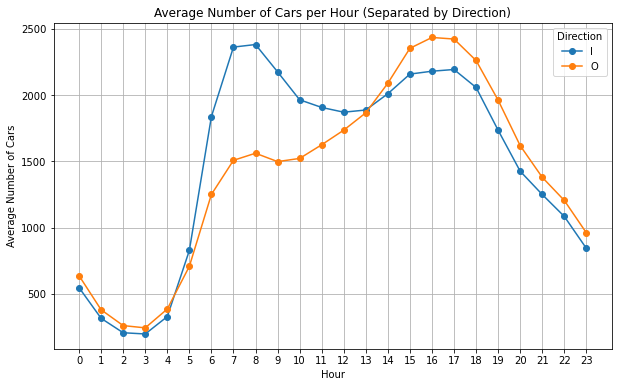

In [48]:
unique_directions = df['Direction'].unique()

plt.figure(figsize=(10, 6))
for direction in unique_directions:
    avg_cars_per_hour_direction = df[df['Direction'] == direction].groupby('Hour')['Total'].mean()
    plt.plot(avg_cars_per_hour_direction, marker='o', linestyle='-', label=direction)

plt.title('Average Number of Cars per Hour (Separated by Direction)')
plt.xlabel('Hour')
plt.ylabel('Average Number of Cars')
plt.grid(True)
plt.xticks(range(24))
plt.legend(title='Direction')
plt.show()

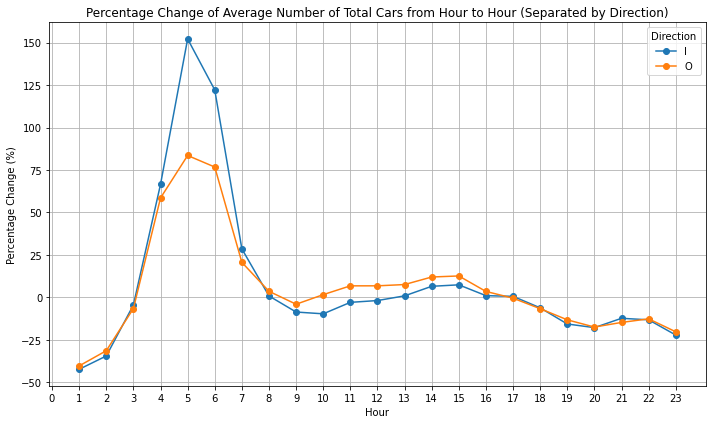

In [49]:
avg_cars_per_hour_direction = df.groupby(['Hour', 'Direction'])['Total'].mean().unstack()

percentage_change_direction = avg_cars_per_hour_direction.pct_change() * 100

plt.figure(figsize=(10, 6))
for direction in percentage_change_direction.columns:
    plt.plot(percentage_change_direction.index, percentage_change_direction[direction], marker='o', linestyle='-', label=direction)

plt.title('Percentage Change of Average Number of Total Cars from Hour to Hour (Separated by Direction)')
plt.xlabel('Hour')
plt.ylabel('Percentage Change (%)')
plt.grid(True)
plt.xticks(range(24))
plt.legend(title='Direction')
plt.tight_layout()
plt.show()

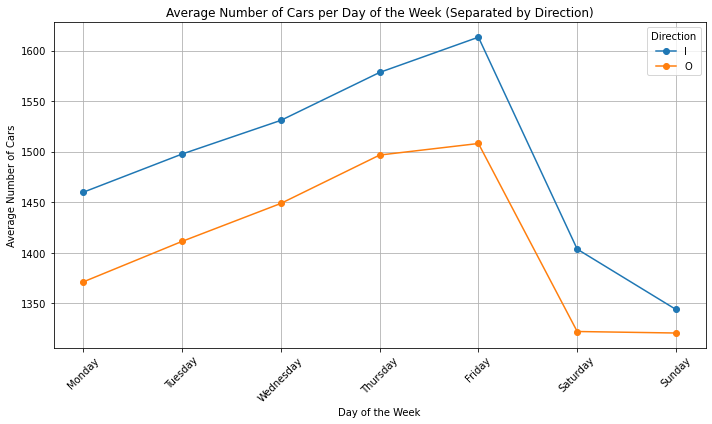

In [50]:
avg_cars_per_day_of_week_direction = df.groupby(['DoW', 'Direction'])['Total'].mean().unstack().reindex(day_order)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
for direction in avg_cars_per_day_of_week_direction.columns:
    plt.plot(avg_cars_per_day_of_week_direction.index, avg_cars_per_day_of_week_direction[direction], marker='o', label=direction)

plt.title('Average Number of Cars per Day of the Week (Separated by Direction)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Cars')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Direction')
plt.tight_layout()
plt.show()

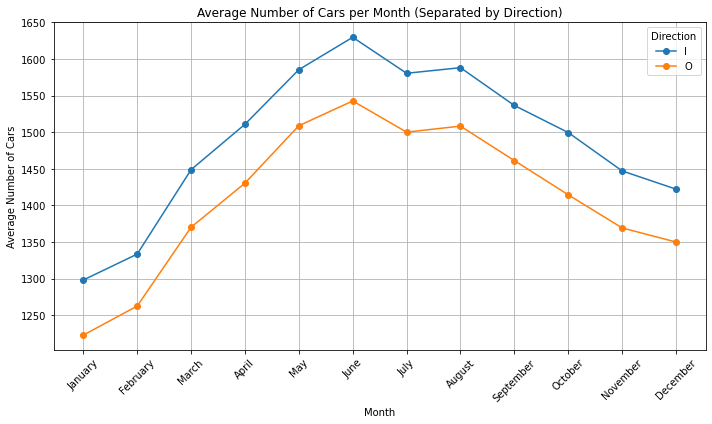

In [51]:
avg_cars_per_month_direction = df.groupby(['Month', 'Direction'])['Total'].mean().unstack()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(10, 6))
for direction in avg_cars_per_month_direction.columns:
    plt.plot(avg_cars_per_month_direction.index, avg_cars_per_month_direction[direction], marker='o', linestyle='-', label=direction)

plt.title('Average Number of Cars per Month (Separated by Direction)')
plt.xlabel('Month')
plt.ylabel('Average Number of Cars')
plt.grid(True)
plt.xticks(range(1, 13), month_order)
plt.xticks(rotation=45)
plt.legend(title='Direction')
plt.tight_layout()
plt.show()

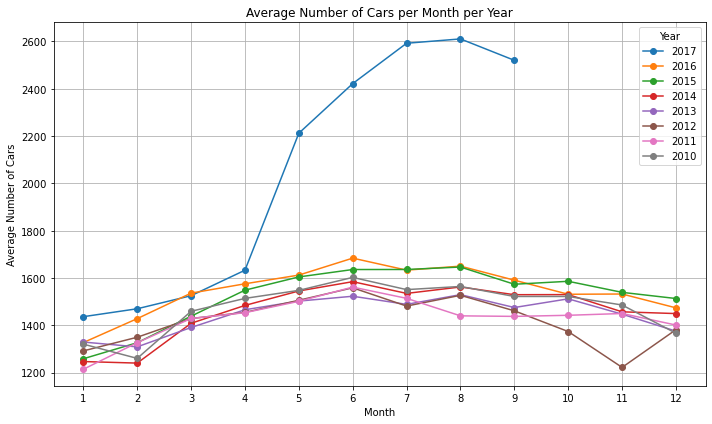

In [52]:
# Remove outgoing data
df = df[df['Direction'] == 'I'].drop(columns=['Direction'])

avg_cars_per_month_per_year = df.groupby(['Year', 'Month'])['Total'].mean()

plt.figure(figsize=(10, 6))
for year in df['Year'].unique():
    plt.plot(avg_cars_per_month_per_year[year], marker='o', label=year)

plt.title('Average Number of Cars per Month per Year')
plt.xlabel('Month')
plt.ylabel('Average Number of Cars')
plt.grid(True)
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.tight_layout()
plt.show()

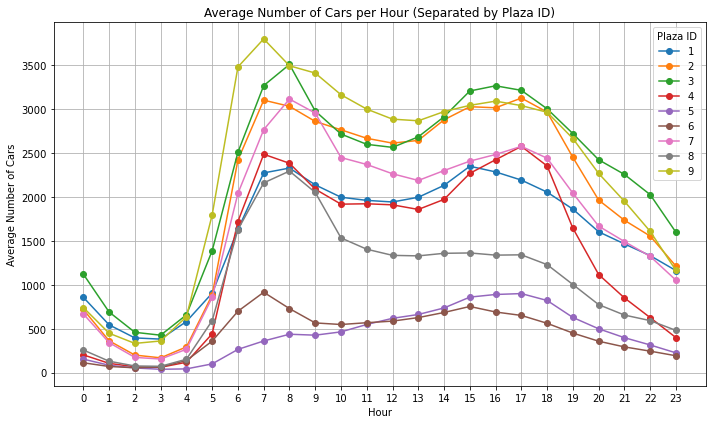

In [53]:
avg_cars_per_hour_plaza = df.groupby(['Hour', 'Plaza ID'])['Total'].mean().unstack()

plt.figure(figsize=(10, 6))
for plaza_id in avg_cars_per_hour_plaza.columns:
    plt.plot(avg_cars_per_hour_plaza.index, avg_cars_per_hour_plaza[plaza_id], marker='o', linestyle='-', label=plaza_id)

plt.title('Average Number of Cars per Hour (Separated by Plaza ID)')
plt.xlabel('Hour')
plt.ylabel('Average Number of Cars')
plt.grid(True)
plt.xticks(range(24))
plt.legend(title='Plaza ID')
plt.tight_layout()
plt.show()

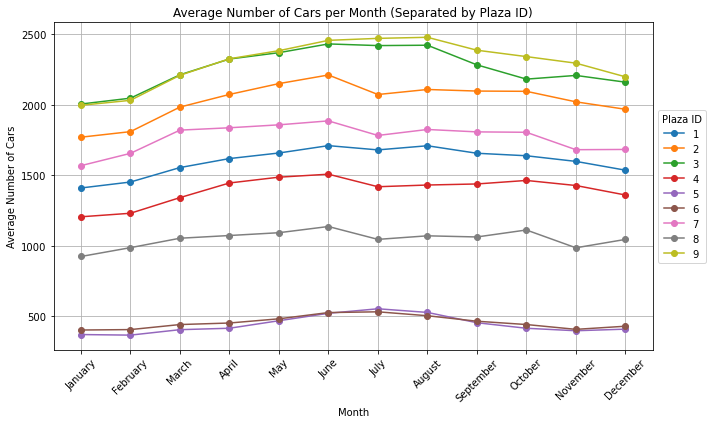

In [54]:
avg_cars_per_month_plaza = df.groupby(['Month', 'Plaza ID'])['Total'].mean().unstack()

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10, 6))
for plaza_id in avg_cars_per_month_plaza.columns:
    plt.plot(month_order, avg_cars_per_month_plaza[plaza_id], marker='o', linestyle='-', label=plaza_id)

plt.title('Average Number of Cars per Month (Separated by Plaza ID)')
plt.xlabel('Month')
plt.ylabel('Average Number of Cars')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='Plaza ID', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

In [55]:
total_cars_per_week_year = df.groupby(['Year', 'Week'])['Total'].sum()
total_cars_per_week_year_table = total_cars_per_week_year.reset_index()

total_cars_per_week_year_table.rename(columns={'Total': 'total'}, inplace=True)

total_cars_per_week_year_table

,Year,Week,total
0,2010,1,2006667
1,2010,2,2078746
2,2010,3,2051476
3,2010,4,2034087
4,2010,5,1975115
...,...,...,...
401,2017,35,858698
402,2017,36,841135
403,2017,37,845691
404,2017,38,731511


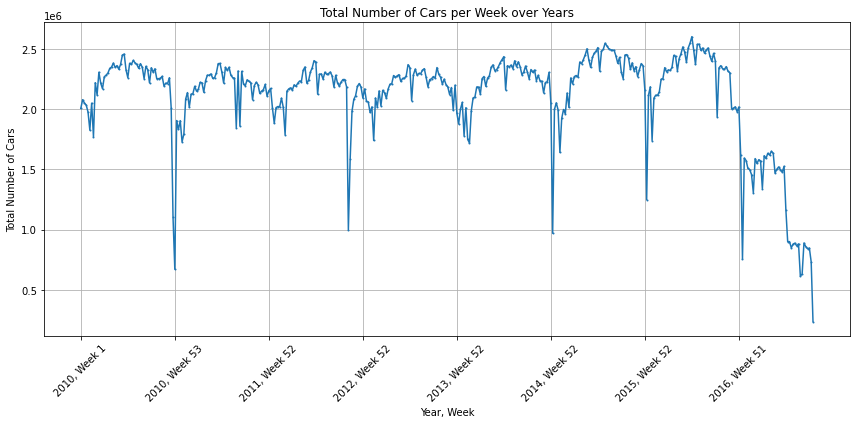

In [56]:
total_cars_per_week_year_table['Year_Week'] = total_cars_per_week_year_table['Year'].astype(str) + ', Week ' + total_cars_per_week_year_table['Week'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(total_cars_per_week_year_table['Year_Week'], total_cars_per_week_year_table['total'], marker='o', markersize=1, linestyle='-')
plt.title('Total Number of Cars per Week over Years')
plt.xlabel('Year, Week')
plt.ylabel('Total Number of Cars')
plt.xticks(rotation=45)
plt.gca().set_xticks(total_cars_per_week_year_table.index[::52])
plt.grid(True)
plt.tight_layout()
plt.show()

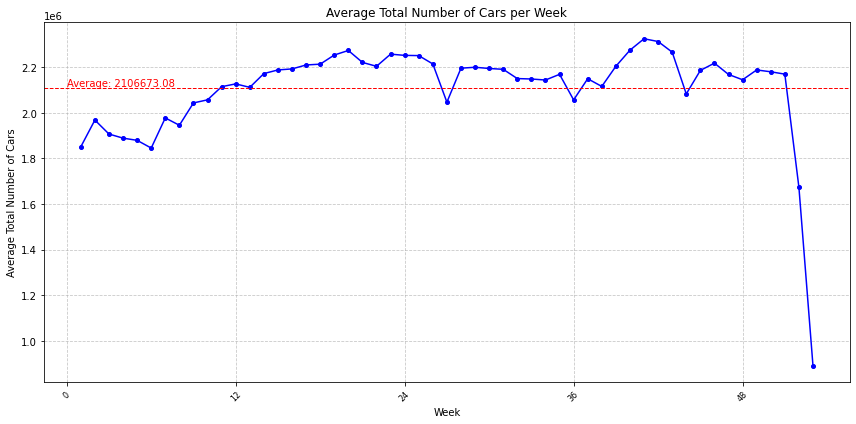

In [57]:
avg_cars_per_week = total_cars_per_week_year_table.groupby('Week')['total'].mean().reset_index()
avg_cars_per_week.rename(columns={'total': 'Total'}, inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(avg_cars_per_week['Week'], avg_cars_per_week['Total'], marker='o', markersize=4, linestyle='-', color='blue', linewidth=1.5)

plt.title('Average Total Number of Cars per Week')
plt.xlabel('Week')
plt.ylabel('Average Total Number of Cars')

plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.gca().set_xticks(avg_cars_per_week.index[::12])

plt.xticks(fontsize=8)
for label in plt.gca().xaxis.get_ticklabels()[::12]:
    label.set_visible(True)
plt.axhline(y=avg_cars_per_week['Total'].mean(), color='red', linestyle='--', linewidth=1)
plt.text(0, avg_cars_per_week['Total'].mean(), f'Average: {avg_cars_per_week["Total"].mean():.2f}', color='red', ha='left', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## Queens Midtown Tunnel

In [76]:
dfQMT = df[df['Plaza ID'] == 7].drop(columns=['Plaza ID']).reset_index(drop=True)
dfQMT.head()

,Date,Hour,# Vehicles - E-ZPass,# Vehicles - VToll,Total,DoW,Month,Year,Week
0,2017-01-09,0,583,51,634,Monday,1,2017,2
1,2017-01-09,1,392,31,423,Monday,1,2017,2
2,2017-01-09,2,246,20,266,Monday,1,2017,2
3,2017-01-09,3,162,32,194,Monday,1,2017,2
4,2017-01-09,4,287,39,326,Monday,1,2017,2


In [77]:
daily_traffic = dfQMT.groupby('Date')['Total'].sum()

fig = px.line(daily_traffic, x=daily_traffic.index, y='Total', title='Daily Traffic Volume at Plaza ID 7')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Total Daily Traffic')
fig.update_layout(xaxis=dict(rangeslider=dict(visible=True), type="date"))

fig.show()

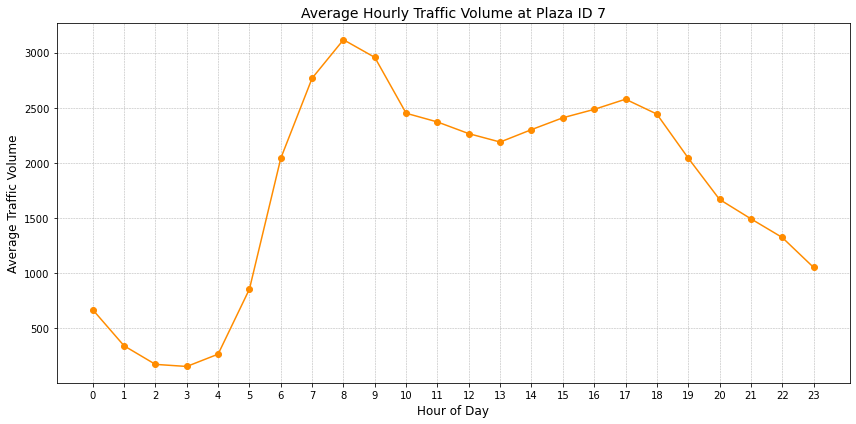

In [69]:
hourly_avg = dfQMT.groupby('Hour')['Total'].mean()

plt.figure(figsize=(12, 6))
plt.plot(hourly_avg.index, hourly_avg, color='darkorange', marker='o', linestyle='-')
plt.title('Average Hourly Traffic Volume at Plaza ID 7', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Average Traffic Volume', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(hourly_avg.index)  # Ensure x-axis has ticks for every hour
plt.tight_layout()
plt.show()

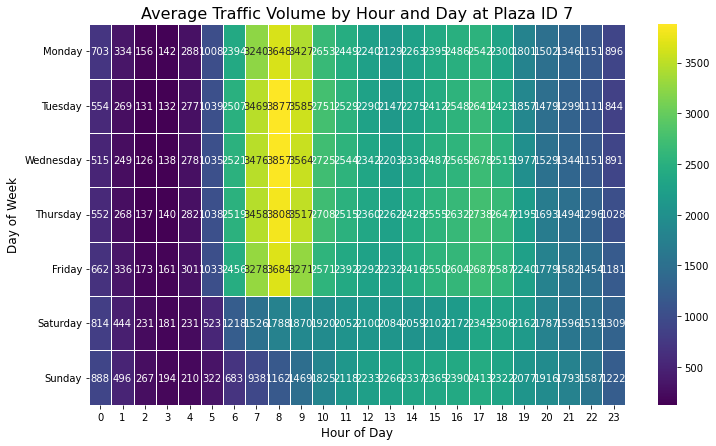

In [70]:
import seaborn as sns

dfQMT['DoW'] = pd.Categorical(dfQMT['DoW'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ordered=True)

grouped = dfQMT.groupby(['DoW', 'Hour'])['Total'].mean().unstack()

plt.figure(figsize=(12, 7))
sns.heatmap(grouped, cmap='viridis', linewidths=.5, annot=True, fmt=".0f")
plt.title('Average Traffic Volume by Hour and Day at Plaza ID 7', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Day of Week', fontsize=12)
plt.yticks(rotation=0)
plt.show()
